In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sickness_table.csv",index_col='date')

In [ ]:
df1.shape

(1152, 7)

In [ ]:
df1.head()

,Unnamed: 0,n_sick,calls,n_duty,n_sby,sby_need,dafted
date,,,,,,,
2016-04-01,0,73,8154.0,1700,90,4.0,0.0
2016-04-02,1,64,8526.0,1700,90,70.0,0.0
2016-04-03,2,68,8088.0,1700,90,0.0,0.0
2016-04-04,3,71,7044.0,1700,90,0.0,0.0
2016-04-05,4,63,7236.0,1700,90,0.0,0.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1152 entries, 2016-04-01 to 2019-05-27
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1152 non-null   int64  
 1   n_sick      1152 non-null   int64  
 2   calls       1152 non-null   float64
 3   n_duty      1152 non-null   int64  
 4   n_sby       1152 non-null   int64  
 5   sby_need    1152 non-null   float64
 6   dafted      1152 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 72.0+ KB


In [ ]:
df1.tail()

,Unnamed: 0,n_sick,calls,n_duty,n_sby,sby_need,dafted
date,,,,,,,
2019-05-23,1147,86,8544.0,1900,90,0.0,0.0
2019-05-24,1148,81,8814.0,1900,90,0.0,0.0
2019-05-25,1149,76,9846.0,1900,90,146.0,56.0
2019-05-26,1150,83,9882.0,1900,90,160.0,70.0
2019-05-27,1151,77,8790.0,1900,90,0.0,0.0


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df1.index

Index(['2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04', '2016-04-05',
       '2016-04-06', '2016-04-07', '2016-04-08', '2016-04-09', '2016-04-10',
       ...
       '2019-05-18', '2019-05-19', '2019-05-20', '2019-05-21', '2019-05-22',
       '2019-05-23', '2019-05-24', '2019-05-25', '2019-05-26', '2019-05-27'],
      dtype='object', name='date', length=1152)

In [ ]:
df1.isnull().sum()   # Checking for Null values

Unnamed: 0    0
n_sick        0
calls         0
n_duty        0
n_sby         0
sby_need      0
dafted        0
dtype: int64

In [ ]:
df1= df1[["n_sick",'calls','n_duty','sby_need','dafted']]

In [ ]:
#Changing format of date from object to datetime format.
df1.index=pd.to_datetime(df1.index)

In [ ]:
#Changing data type from float to integer.
df1['calls']=df1['calls'].astype(int)

<ipython-input-13-cfcfc837c74c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['calls']=df1['calls'].astype(int)


In [ ]:
#Changing data type from float to integer.
df1['sby_need']=df1['sby_need'].astype(int)

<ipython-input-14-d49489409e52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sby_need']=df1['sby_need'].astype(int)


In [ ]:
#Changing data type from float to integer.
df1['dafted']=df1['dafted'].astype(int)

<ipython-input-15-925934739581>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['dafted']=df1['dafted'].astype(int)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1152 entries, 2016-04-01 to 2019-05-27
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   n_sick    1152 non-null   int64
 1   calls     1152 non-null   int64
 2   n_duty    1152 non-null   int64
 3   sby_need  1152 non-null   int64
 4   dafted    1152 non-null   int64
dtypes: int64(5)
memory usage: 54.0 KB


In [ ]:
df1.index

DatetimeIndex(['2016-04-01', '2016-04-02', '2016-04-03', '2016-04-04',
               '2016-04-05', '2016-04-06', '2016-04-07', '2016-04-08',
               '2016-04-09', '2016-04-10',
               ...
               '2019-05-18', '2019-05-19', '2019-05-20', '2019-05-21',
               '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-25',
               '2019-05-26', '2019-05-27'],
              dtype='datetime64[ns]', name='date', length=1152, freq=None)

# **Data Visualization for understanding Relationship between variables**

In [ ]:
import matplotlib.pyplot as plt

**Graph 1**

Text(0.5, 1.0, 'date vs number of standbys, which are activated on a given day')

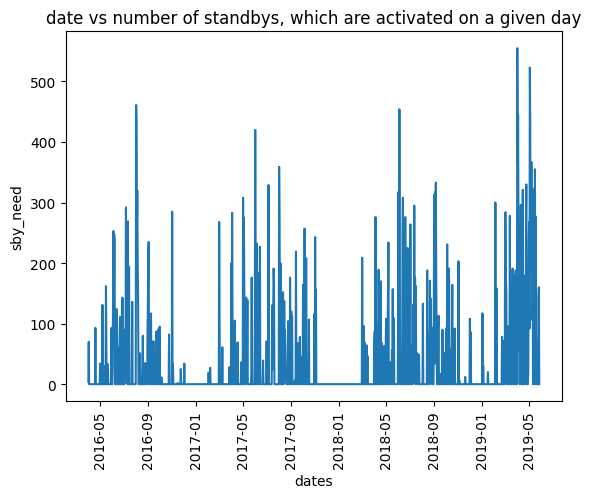

In [ ]:
plt.plot(df1.index, df1['sby_need'])
plt.xlabel("dates")
plt.ylabel("sby_need")
plt.xticks(rotation='vertical')
plt.title("date vs number of standbys, which are activated on a given day")

**We can see from the graph every year (2016 to 2019) from May to October mostly stanbys drivers are activated. And from November to March no any stand by driver is used.**

**Graph 2**

Text(0.5, 1.0, 'date vs number of sick drivers')

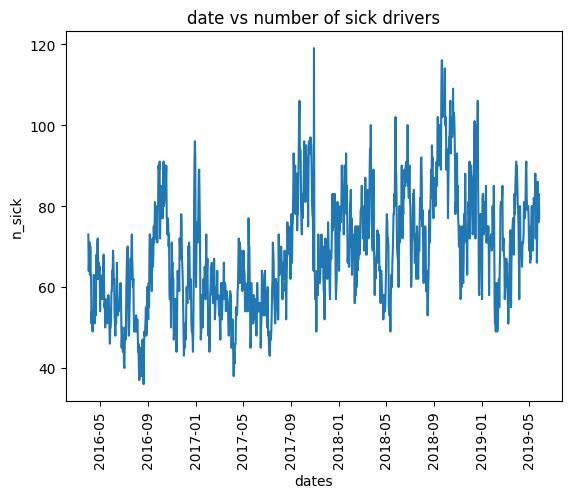

In [ ]:
plt.plot(df1.index, df1['n_sick'])
plt.xlabel("dates")
plt.ylabel("n_sick")
plt.xticks(rotation='vertical')
plt.title("date vs number of sick drivers")

**We can observe from the graph that during winter months (from November to January) more number of drivers are sick.**

**Graph 3**

Text(0.5, 1.0, 'number of standbys, which are activated on a given day vs number of emergency calls ')

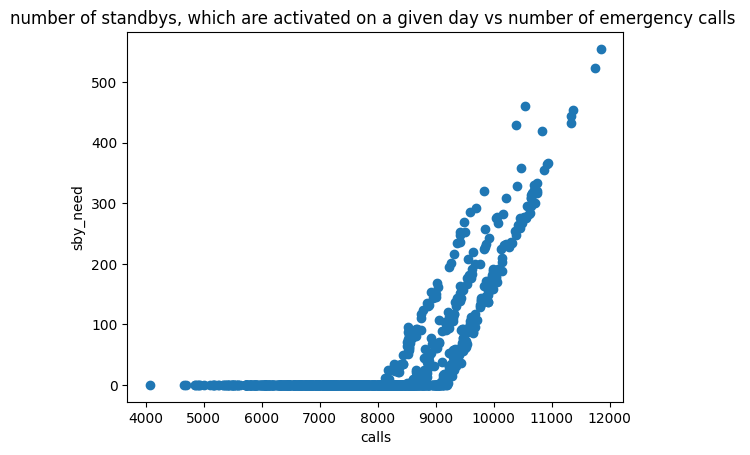

In [ ]:
plt.scatter(data =df1, x="calls", y="sby_need")
plt.xlabel("calls")
plt.ylabel("sby_need")
plt.title("number of standbys, which are activated on a given day vs number of emergency calls ")

**We can observe when number of emergency calls incresed beyond 8000 there is sudden increse in the number of rescue drivers activated.**

**Graph 4**

Text(0.5, 1.0, 'dates vs number of emergency calls')

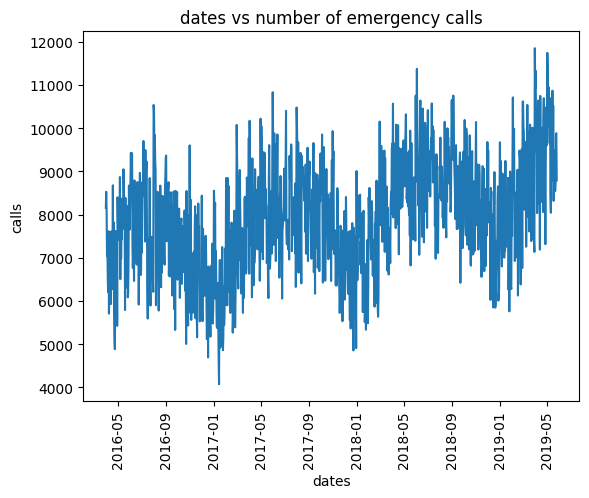

In [ ]:
plt.plot(df1.index, df1['calls'])
plt.xlabel("dates")
plt.ylabel("calls")
plt.xticks(rotation='vertical')
plt.title("dates vs number of emergency calls")

**We can see that numbers of emergency calls are increasing every year. That's why there are more number of duty drivers alloacted in 2019 which is 1900.**

**Graph 5**

Text(0.5, 1.0, 'number of standbys, which are activated on a given day vs number of drivers on duty available ')

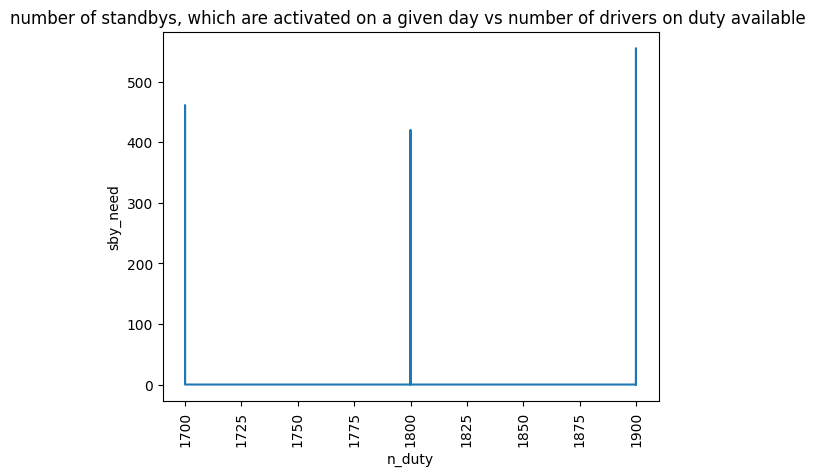

In [ ]:
plt.plot(df1['n_duty'], df1['sby_need'])
plt.xlabel("n_duty")
plt.ylabel("sby_need")
plt.xticks(rotation='vertical')
plt.title("number of standbys, which are activated on a given day vs number of drivers on duty available ")

**We can see(in the previous graph 4) that numbers of emergency calls are increasing every year and more number of duty drivers alloacted in year 2019 which is 1900 even though more number of standbys were activated(as shown in this graph 5).**

**Graph 6**

Text(0.5, 1.0, 'number of standbys, which are activated on a given day vs number of additional drivers needed due to not enough standbys ')

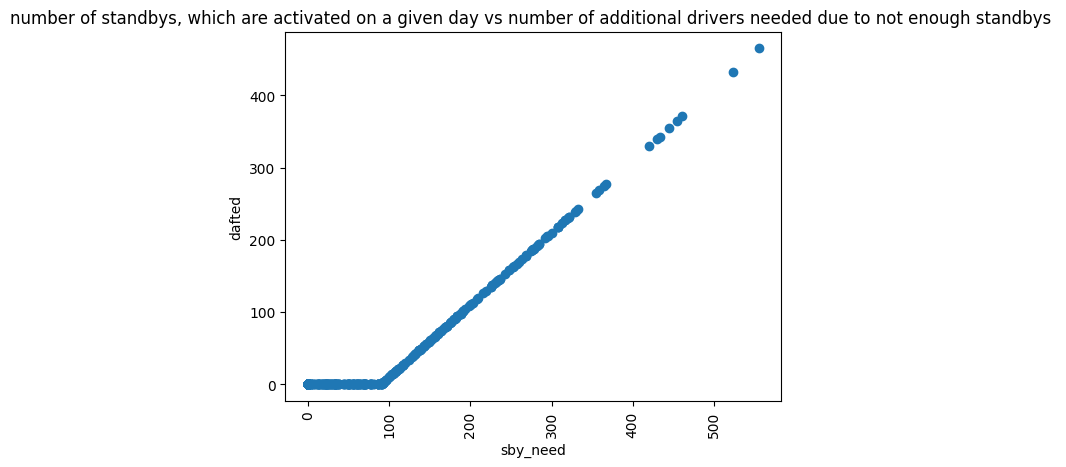

In [ ]:
plt.scatter(df1['sby_need'], df1['dafted'])
plt.xlabel("sby_need")
plt.ylabel("dafted")
plt.xticks(rotation='vertical')
plt.title("number of standbys, which are activated on a given day vs number of additional drivers needed due to not enough standbys ")

**It can be observed that after 90 the number of standbys, which are activated on a given day increases with number of additional drivers needed due to not enough standbys. So these columns "sby_need" and "dafted" are positively correlated with each other.**

**Conclusion of EDA (Exploratory Data Analysis)**
1. We can see from the graph 1 that every year (2016 to 2019) from May to October mostly stanbys drivers were activated on a given day. And from November to March no any stand by driver is used.

2. We can observe from the graph 2 that during winter months (from November to January) more number of drivers are sick.

3. We can observe from graph 3 that when number of emergency calls increased beyond 8000, there is sudden increase in the number of rescue drivers activated on a given day.

4. We can see in graph 4 that numbers of emergency calls are increasing every year. That's why there are more number of duty drivers alloacted in 2019 which is 1900.

5. We can see(in the previous graph 4) that numbers of emergency calls are increasing every year and more number of duty drivers alloacted in year 2019 which is 1900 even though more number of standbys were needed to be activated(as shown in this graph 5).

6. It can be observed that if the number of standbys increased beyond 90, the  number of additional drivers needed due to not enough standbys also increased. So these columns "sby_need" and "dafted" are positively correlated with each other.










<Axes: >

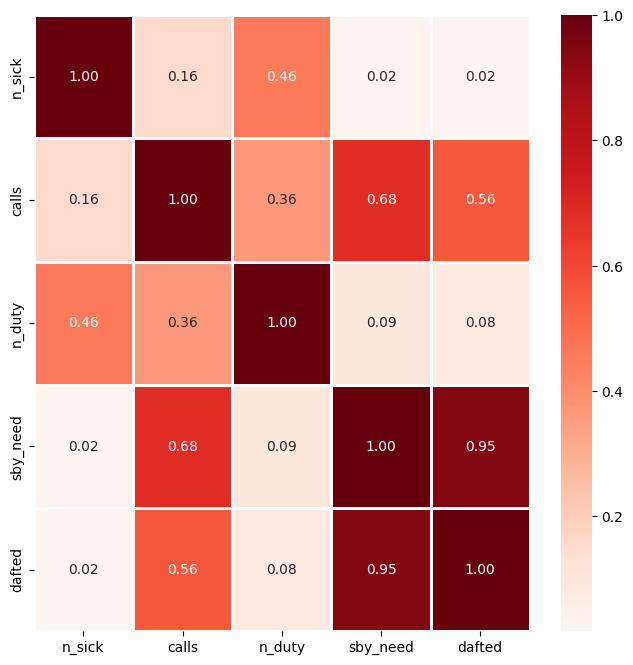

In [ ]:
plt.figure(figsize=(8,8))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Reds',linewidths=2,fmt=".2f")

****

**The color of the cell indicates the direction and strength of the correlation: a positive correlation is indicated by a warm color (such as Red) and a negative correlation is indicated by a cool color (such as Orange).The intensity of the color represents the strength of the correlation.**

# **Model 1 (By taking whole dataset)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as mse
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [ ]:
df1.head()

,n_sick,calls,n_duty,sby_need,dafted
date,,,,,
2016-04-01,73,8154,1700,4,0
2016-04-02,64,8526,1700,70,0
2016-04-03,68,8088,1700,0,0
2016-04-04,71,7044,1700,0,0
2016-04-05,63,7236,1700,0,0


In [ ]:
df1.columns

Index(['n_sick', 'calls', 'n_duty', 'sby_need', 'dafted'], dtype='object')

In [ ]:
# defining dependent variable
dependent_variables = 'sby_need'

# defining independent variable
independent_variables = list(df1.columns.drop(['sby_need']))

In [ ]:
dependent_variables

'sby_need'

In [ ]:
independent_variables

['n_sick', 'calls', 'n_duty', 'dafted']

In [ ]:
# Create the data of independent variables
X = df1[independent_variables]

# Create the data of dependent variable
y = df1[dependent_variables]

In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(921, 4)
(231, 4)


# **Using Linear Regression**

In [ ]:
# Here we Train the model
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.9278947685212087

In [ ]:
y_pred = reg.predict(X_test)


In [ ]:
MSE  = mse(y_test, y_pred)
print("MSE :" , MSE)


MSE : 459.82614803882956


In [ ]:

MAE  = mean_absolute_error(y_test, y_pred )
print("MAE :" , MAE)

MAE : 16.768316627231215


In [ ]:
r2_linear = r2_score(y_test, y_pred)
print("r2 score of Linear regressor:",r2_linear)


r2 score of Linear regressor: 0.9379580615608428


In [ ]:
y_test = pd.DataFrame(y_test)
y_test.columns=['Actual']
y_test.shape

(231, 1)

In [ ]:
combined = pd.concat([y_test, pd.Series(y_pred , index=y_test.index)],axis=1)


In [ ]:
combined.columns =["Actual","Predictions"]
combined.head(10)

,Actual,Predictions
date,,
2018-11-03,0,7.170746
2017-03-30,0,12.758644
2019-04-01,555,639.218327
2018-02-08,0,9.645338
2017-02-06,27,29.640543
2018-05-24,0,23.183952
2018-04-04,276,276.735506
2016-11-11,0,10.598653
2017-08-05,199,176.078469


In [ ]:
y_pred.mean()

37.782530164658795

In [ ]:
X_test[1:3]

,n_sick,calls,n_duty,dafted
date,,,,
2017-03-30,58,7728,1800,0
2019-04-01,85,11850,1900,465


In [ ]:
from datetime import datetime

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data to predict.csv", index_col ='date')
df2= df2[["n_sick",'calls','n_duty','dafted']]

df2.head()

,n_sick,calls,n_duty,dafted
date,,,,
9/16/2023,70,9606,1900,2
9/17/2023,74,11742,1900,5
9/18/2023,66,11334,1900,0
9/19/2023,75,10044,1900,0
9/20/2023,67,10464,1900,2


In [ ]:
#Changing format of date from object to datetime format.
df2.index=pd.to_datetime(df2.index)

In [ ]:
#Changing data type from float to integer.
df2['calls']=df2['calls'].astype(int)

In [ ]:
#Changing data type from float to integer.
df2['dafted']=df2['dafted'].astype(int)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2023-09-16 to 2023-10-15
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   n_sick  30 non-null     int64
 1   calls   30 non-null     int64
 2   n_duty  30 non-null     int64
 3   dafted  30 non-null     int64
dtypes: int64(4)
memory usage: 1.2 KB


In [ ]:
new_input = df2
# get prediction for new input
new_output = reg.predict(new_input)
# summarize input and output
#print(new_input, new_output)
predictions_for_October_2023 = pd.concat([new_input, pd.Series(new_output , index=new_input.index)],axis=1)
predictions_for_October_2023.columns =["n_sick",'calls','n_duty','dafted',"Predictions_for_Oct2023"]

# **Ridge**

In [ ]:
from sklearn.linear_model import Ridge
Rreg = Ridge(alpha=0.1)

In [ ]:
Rreg = Rreg.fit(X_train, y_train)

In [ ]:
Rreg.score(X_train, y_train)

0.927894768521207

In [ ]:
y_pred_rid = Rreg.predict(X_test)

In [ ]:
MSE  = mse(y_test, y_pred_rid)
print("MSE :" , MSE)

MSE : 459.826125241745


In [ ]:
MAE  = mean_absolute_error(y_test, y_pred_rid )
print("MAE :" , MAE)
r2_rid = r2_score(y_test, y_pred_rid)
print("r2 score of Ridge regressor:",r2_rid)

MAE : 16.768316976981907
r2 score of Ridge regressor: 0.9379580646367343


# **LASSO**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
from sklearn.model_selection import cross_val_score
L1 = Lasso(alpha = 0.2, max_iter=10000,selection='cyclic', tol=0.0001,)

In [ ]:
L1.fit(X_train, y_train)

Lasso(alpha=0.2, max_iter=10000)

In [ ]:
y_pred_lasso = L1.predict(X_test)

In [ ]:
L1.score(X_train,y_train)

0.92789471605878

In [ ]:
MSE  = mse(y_test, y_pred_lasso)
print("MSE :" , MSE)

MSE : 459.73682309311573


In [ ]:
MAE  = mean_absolute_error(y_test, y_pred_lasso )
print("MAE :" , MAE)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("r2 score of Lasso regressor:",r2_lasso)

MAE : 16.76788222537641
r2 score of Lasso regressor: 0.9379701137088268


# **Decision Tree**

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

MSE  = mse(y_test, y_pred_dt)
print("MSE :" , MSE)

MAE  = mean_absolute_error(y_test, y_pred_dt )
print("MAE :" , MAE)

r2_dt = r2_score(y_test, y_pred_dt)
print("r2 score of decision tree regressor:",r2_dt)





MSE : 80.37744709835712
MAE : 3.8443599086270996
r2 score of decision tree regressor: 0.9891550912316718


# **Random** **Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Create a random forest regressor with n_estimators=500, max_depth=8, and n_jobs=2
random_forest = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=2)

# Fit the random forest to the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest.predict(X_test)

# Calculate the mean squared error (MSE) between the predicted and actual values
MSE = mean_squared_error(y_test, y_pred_rf)
print("MSE:", MSE)

MAE  = mean_absolute_error(y_test, y_pred_rf )
print("MAE :" , MAE)

r2_rf = r2_score(y_test, y_pred_rf)
print("r2 score of Random forest regressor:",r2_rf)



MSE: 40.965867703763884
MAE : 1.6275212051367354
r2 score of Random forest regressor: 0.9944726896175358


# **AdaBoostRegressor**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.01)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)

MSE = mean_squared_error(y_test, y_pred_ada)
print("MSE :", MSE)

MAE  = mean_absolute_error(y_test, y_pred_ada )
print("MAE :" , MAE)

r2_ada = r2_score(y_test, y_pred_ada)
print("r2 score of AdaBoost regressor:",r2_ada)

MSE : 240.38153665360193
MAE : 8.277951864408603
r2 score of AdaBoost regressor: 0.9675665758404992


# **XGBRegressor**

In [ ]:
import xgboost as xgb

xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=8, n_jobs=2)
xgboost.fit(X_train, y_train)
y_pred_xgb = xgboost.predict(X_test)

MSE = mean_squared_error(y_test, y_pred_xgb)
print("MSE :", MSE)

MAE  = mean_absolute_error(y_test, y_pred_xgb )
print("MAE :" , MAE)

r2_xgb = r2_score(y_test, y_pred_xgb)
print("r2 score of XGB regressor:",r2_xgb)

MSE : 18.710008680350157
MAE : 1.3786151774224353
r2 score of XGB regressor: 0.9974755563342945


In [ ]:
new_input = df2
# get prediction for new input
new_output = xgboost.predict(new_input)
# summarize input and output
#print(new_input, new_output)
predictions_for_October_2023 = pd.concat([new_input, pd.Series(new_output , index=new_input.index)],axis=1)
predictions_for_October_2023.columns =["n_sick",'calls','n_duty','dafted',"Predictions_for_Oct2023"]
predictions_for_October_2023.head(30)

In [ ]:
# saving the best performing model to disk
filename = 'xgboost.sav'
pickle.dump(xgboost, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9974755563342945
